# Clustering

- In this Notebook, Clustering has been applied to the dataset for parking penalties in London.
  
- The clustering techniques that are used are 
  - K-Means
  - K-Modes
  - K Prototype

The dataset has 7 default features and 1 newly added feature for date to divide the dates in to quarters. 

 ### Columns             

 0   Make                 
 1   Colour            
 2   Issue Time           
 3   Contravention Code  
 4   Location             
 5   PA_Details          
 6   Issue Date    


 All these features are in string format. In the below segments, we would separate Numerical features from categorical features and apply clustering techniques on subsets of data. 

  - K-Means
  
            For Numerical feature - ***Issue Time*** we will apply K-Means algorithm to find potential groups on the basis of similarities in the feature


  - K-Modes
  
            For Categorical features - ***Make,	Colour,	Location, Issue Date, Contravention Code and PA_Details*** we will apply K-Modes algorithm to find potential groups on the basis of similarities between these features. As K-means only work for Numerical features. 



  - K Prototype

            To analyse the whole dataset, we will use K-Prototype algorithm. K-Prototype is used when the dataset has both categorical and Numerical features, that we have in our dataset.

### Importing Libraries

In [65]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.simplefilter("ignore")


### Loading Dataset

In [66]:
## Load Dataset
df = pd.read_csv('Project Parking.csv')
df.shape


(380639, 8)

In [67]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,2019-01-01,0.25
1,0,NaN,0:19,16,Anne Street,1456,2019-01-01,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,2019-01-01,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,2019-01-01,0.33
4,0,NaN,0:22,62,Warton Road,1456,2019-01-01,0.37


## Data Preprocessing

As the data is not in correct format, we will clean the data by removing unwanted and test records. Also date has been changed to correct format and Numerical features are also converted from strings to numerical format. 



### Dates
- Dates have been divided into quarters manually for better clustering results.

In [68]:
# Applying the condition
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-01')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-02')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-03')] = 'Q1'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-04')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-05')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-06')] = 'Q2'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-07')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-08')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-09')] = 'Q3'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-10')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-11')] = 'Q4'
df['Issue Date'].loc[df['Issue Date'].str.contains('2019-12')] = 'Q4'

df['Issue Date'].loc[df['Issue Date'].str.contains('2020-01')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-02')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-03')] = 'Q5'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-04')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-05')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-06')] = 'Q6'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-07')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-08')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-09')] = 'Q7'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-10')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-11')] = 'Q8'
df['Issue Date'].loc[df['Issue Date'].str.contains('2020-12')] = 'Q8'

df['Issue Date'].loc[df['Issue Date'].str.contains('2021-01')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-02')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-03')] = 'Q9'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-04')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-05')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-06')] = 'Q10'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-07')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-08')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-09')] = 'Q11'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-10')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-11')] = 'Q12'
df['Issue Date'].loc[df['Issue Date'].str.contains('2021-12')] = 'Q12'

In [69]:
df['Issue Date'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12'], dtype=object)

### Issue Time
- Time has been converted in to a decimal format to deal it as a Numeric Feature. 
  
#### Steps of conversion in the excel file: 
1. Multiplied the time with 60
2. Change format from time to Number


12:15 = 12.25

19:30 = 19.5

01:45 = 01.75

In [ ]:
df['Issue Time Decimal'] = pd.to_timedelta('00:'+df['Issue Time']).dt.total_seconds()/60
df['Issue Time Decimal']

In [70]:
df['Issue Time Decimal']


0          0.25
1          0.32
2          0.32
3          0.33
4          0.37
          ...  
380634    15.52
380635    16.42
380636    16.50
380637    17.07
380638    17.13
Name: Issue Time Decimal, Length: 380639, dtype: float64

In [71]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### Contravention Code

In [72]:
df['Contravention Code'].unique().shape

(136,)

In [73]:
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', 'W23',
       'W01', 'W61', 'W63', '21', '12', '19', '01a', '6', '27', '11u',
       '30', '54', '26', '73u', '82u)', '01o)', '2', '83', '73', '165)',
       '45', '11u)', '47', '80', '92', '87', '28', '48', '5', 'W12', '91',
       '62g', '82', '23g', '86', 'W02', '05u', '23c', '11', '85', '82u',
       '95', '8', '35', 'W62', '22', '10', '62g)', '80u', 'W27', 'W87',
       '61', 'W21', '71', 'W26', 'W11', '81', 'W06', '49', '23', '20',
       'W57', 'W19', 'W45', 'W47', '55', 'W01A', 'W25', 'W20', 'W93',
       '24', 'W24', '43', '70', '23r', 'W41', 'W04', '9', 'W16', 'W05',
       'W30', 'W92', '61g)', 'W48', 'W14', 'W73', 'W91', 'W31', 'W49',
       '96', '56', 'W95', 'W46', '23s', 'W40', 'W99', '18', '4', '63',
       'W82', 'W22', '73u)', 'W89', '61g', 'W09', 'W83', 'W08', '23e',
       '164', 'W35', '23d', '93', 'W70', 'W55', 'W56', '7', '89', '232',
       '23p', '5u)', 'W42', 'W10', '36', 'W54', '57', 'W90'], dtype=

- Dropping Contravention codes which contains 'W'

In [74]:
df = df[~df['Contravention Code'].str.contains('W')]

In [75]:
# df['Contravention Code']=df['Contravention Code'].str.replace("u","")
# df['Contravention Code']=df['Contravention Code'].str.replace("g","")
# df['Contravention Code']=df['Contravention Code'].str.replace("a","")
# df['Contravention Code']=df['Contravention Code'].str.replace("c","")
# df['Contravention Code']=df['Contravention Code'].str.replace("o","")
# df['Contravention Code']=df['Contravention Code'].str.replace(")","")
# df['Contravention Code']=df['Contravention Code'].str.replace("d","")
# df['Contravention Code']=df['Contravention Code'].str.replace("p","")
# df['Contravention Code']=df['Contravention Code'].str.replace("e","")
# df['Contravention Code']=df['Contravention Code'].str.replace("s","")
# df['Contravention Code']=df['Contravention Code'].str.replace("r","")
df['Contravention Code'].unique()

array(['1', '16', '25', '01o', '62', '40', '165', '99', '14', '21', '12',
       '19', '01a', '6', '27', '11u', '30', '54', '26', '73u', '82u)',
       '01o)', '2', '83', '73', '165)', '45', '11u)', '47', '80', '92',
       '87', '28', '48', '5', '91', '62g', '82', '23g', '86', '05u',
       '23c', '11', '85', '82u', '95', '8', '35', '22', '10', '62g)',
       '80u', '61', '71', '81', '49', '23', '20', '55', '24', '43', '70',
       '23r', '9', '61g)', '96', '56', '23s', '18', '4', '63', '73u)',
       '61g', '23e', '164', '23d', '93', '7', '89', '232', '23p', '5u)',
       '36', '57'], dtype=object)

In [76]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,0,NaN,0:15,1,North Crescent,1485,Q1,0.25
1,0,NaN,0:19,16,Anne Street,1456,Q1,0.32
2,0,NaN,0:19,25,Celebration Avenue,1252,Q1,0.32
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,Q1,0.33
4,0,NaN,0:22,62,Warton Road,1456,Q1,0.37


### PA Details

- Dropping characters from PA Details to handle duplicates

In [77]:
df['PA_Details'].unique()

array(['1485', '1456', '1252', '1313', '1453', '1498', '1142', '1461',
       '1481', '1463', '1435', '1442', '1506', '1331', '1318', '1507',
       '1454', '1492', '1475', '1482', '1468', '3293', '1504', '1494',
       '3300', '3303', '3288', '3292', '1516', '1433', '3289', '1457',
       '1513', '1518', '1466', '1524', '3295', '3247', '1521', '1508',
       '3323', '1510', '3329', '1462', '1281', '3326', '3287', '3318',
       '1505', '1499', '1381', '1146', '1309', '992', '3330', '1464',
       '1458', '1351', '1514', '3327', '3324', '1519', '3328', '3235',
       '1306', '1500', '3254', '3299', '1434', 'PN3260', '1522', 'PN1435',
       '3264', '3216', 'PN1313', 'PN3288', 'PN1498', '1520', '3191',
       '1247', 'PN3239', '1491', 'PN1462', 'PN1433', 'PN1463', '1410',
       'PN1438', 'PN1306', '1438', 'PN1458', '1523', '3237', '3266',
       'PN3269', 'PN1464', 'PN1453', '1490', 'PN1318', 'PN1419', '3298',
       'PN1410', '3239', 'PN1142', 'PN1481', 'PN1401', 'PN1466', 'PN1499',
 

In [78]:
df['PA_Details']=df['PA_Details'].str.replace("PN","")
df['PA_Details']=df['PA_Details'].str.replace(")","")
df.drop(df.index[df['PA_Details'] == 'icpsadmin'], inplace = True)
df.drop(df.index[df['PA_Details'] == '999999999'], inplace = True)
df.drop(df.index[df['PA_Details'] == '999'], inplace = True)

### Location
- Dropping Test Locations

In [79]:
df = df[~df['Location'].str.contains('Test')]

###  Null values

- Dropping Null values from whole dataset

In [80]:
df.dropna(inplace=True)
df.shape

(375800, 8)

###  Make
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.

- Dropping data where Make is 0 and 1n/a

In [81]:
df.Make=df.Make.str.lower()
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', '1n/a', 'a c',
       'aixam', 'daf', 'abarth', 'bmc', 'isuzu', 'aston martin', 'daewoo',
       'dodge', 'ds', 'infinity', 'daihatsu', 'eunos', 'ferrari', 'fiat',
       'alvis', 'jeep', 'kia', 'land rover', 'ldv', 'lexus',
       'mercedes benz', 'mercedes-benz', 'mini', 'mitsubishi', 'nissan',
       'peugeot', 'porsche', 'levc', 'opel', 'mercedes', 'range rover',
       'maxus', 'mazda', 'renault', 'lti', 'man', 'mg', 'piaggio',
       'maserati', 'proton', 'leyland', 'lincoln', 'london taxi', 'matra',
       'mahindra', 'malaguti', 'reliant', 'mercury', 'saab', 'scania',
       'seat', 'skoda', 'smart', 'subaru', 'toyota', 'vauxhall',
       'rolls royce', 'rolls-royce', 'volkswagen', 'ssang yong', 'taxi',
       'rover', 'suzuki', 'ssangyong', 'unknown', 'tesla', 'singer',
       'vanden pla

In [82]:
df.drop(df.index[df['Make'] == 0], inplace = True)
df.drop(df.index[df['Make'] == '1n/a'], inplace = True)
df['Make'].loc[df['Make'].str.contains('harley davison')] = 'harley davidson'
df['Make'].loc[df['Make'].str.contains('mercedes')] = 'mercedes'
df['Make'].loc[df['Make'].str.contains('lamborghini')] = 'lambourghini'
df['Make'].loc[df['Make'].str.contains('rolls-royce')] = 'rolls royce'
df['Make'].loc[df['Make'].str.contains('ssangyong')] = 'ssang Yong'
df['Make'].loc[df['Make'].str.contains('SSANGYONG')] = 'Ssang Yong'
df.shape

(375797, 8)

In [83]:
df['Make'].unique()

array(['audi', 'bmw', 'chrysler', 'citroen', 'ford', 'honda', 'hyundai',
       'alfa romeo', 'austin', 'bentley', 'iveco', 'jaguar',
       'austin rover', 'autobianchi', 'bedford', 'dacia', 'a c', 'aixam',
       'daf', 'abarth', 'bmc', 'isuzu', 'aston martin', 'daewoo', 'dodge',
       'ds', 'infinity', 'daihatsu', 'eunos', 'ferrari', 'fiat', 'alvis',
       'jeep', 'kia', 'land rover', 'ldv', 'lexus', 'mercedes', 'mini',
       'mitsubishi', 'nissan', 'peugeot', 'porsche', 'levc', 'opel',
       'range rover', 'maxus', 'mazda', 'renault', 'lti', 'man', 'mg',
       'piaggio', 'maserati', 'proton', 'leyland', 'lincoln',
       'london taxi', 'matra', 'mahindra', 'malaguti', 'reliant',
       'mercury', 'saab', 'scania', 'seat', 'skoda', 'smart', 'subaru',
       'toyota', 'vauxhall', 'rolls royce', 'volkswagen', 'ssang yong',
       'taxi', 'rover', 'suzuki', 'ssang Yong', 'unknown', 'tesla',
       'singer', 'vanden plas', 'volvo', 'triumph', 'lotus', 'mz',
       'chevrolet', 'fre

###  Colour
As there are entries with different cases, we convert the 'make' column in to lower case for all rows and then process the data.


In [84]:
df['Colour'].unique()

array(['Black', 'BLACK', 'black', 'Blue', 'BLUE', 'blue', 'Green',
       'GREEN', 'Grey', 'Other', 'OTHER', 'Purple', 'Red', 'RED', 'red',
       'Silver', 'SILVER', 'White', 'Bronze', 'Brown', 'GREY', 'grey',
       'silver', 'Unspecified', 'Maroon', 'maroon', 'WHITE', 'BROWN',
       'Burgundy', 'Orange', 'white', 'Gold', 'Yellow', 'UNSPECIFIED',
       'PURPLE', 'ORANGE', 'YELLOW', 'gold', 'Beige', 'Cream',
       'Multi-Coloured', 'BEIGE', 'Pink', '1n/a', 'BLack', 'BRONZE',
       'GOLD', 'Light Blue', 'green', 'MAROON', 'MAUVE', 'orange',
       'yellow', 'unspecified', 'other', 'TURQUOISE', 'Mauve', 'brown',
       'cream', 'MULTI-COLOURED'], dtype=object)

In [85]:
df.Colour=df.Colour.str.lower()
df.drop(df.index[df['Colour'] == '1n/a'], inplace = True)
df['Colour'].unique()

array(['black', 'blue', 'green', 'grey', 'other', 'purple', 'red',
       'silver', 'white', 'bronze', 'brown', 'unspecified', 'maroon',
       'burgundy', 'orange', 'gold', 'yellow', 'beige', 'cream',
       'multi-coloured', 'pink', 'light blue', 'mauve', 'turquoise'],
      dtype=object)

In [86]:
df['PA_Details'].unique()

array(['1500', '3254', '1498', '3299', '1434', '3260', '1433', '1522',
       '1508', '1435', '3264', '1507', '1518', '3216', '1313', '3288',
       '1524', '1519', '1504', '1318', '1142', '1520', '1306', '3292',
       '3191', '3295', '1247', '1516', '1453', '1521', '1462', '3239',
       '1454', '3293', '1491', '1463', '1456', '1281', '1410', '1438',
       '1510', '1464', '1499', '1458', '1523', '1146', '1514', '3237',
       '3266', '3269', '1485', '1490', '1419', '3298', '1252', '3247',
       '1481', '3328', '1401', '1466', '3326', '1461', '1437', '1473',
       '1387', '1468', '1278', '3272', '1502', '1145', '3289', '3235',
       '1513', '1457', '1409', '3156', '3278', '3301', '1482', '3318',
       '1407', '1517', '3287', '3296', '1503', '3205', '1509', '3275',
       '1492', '1506', '3319', '1495', '1418', '1447', '3285', '1505',
       '1351', '1484', '1331', '1442', '1494', '3316', '1515', '1309',
       '1489', '3327', '1475', '1381', '1478', '3300', '3228', '3303',
      

In [87]:
df.head(20),df.shape

(     Make Colour Issue Time Contravention Code            Location PA_Details  \
 162  audi  black       9:31                 19         Antwerp Way       1500   
 163  audi  black      10:30                 12        First Avenue       3254   
 164  audi  black      10:30                 12       Ingestre Road       1498   
 165  audi  black      10:30                 12    Lawrence Road E6       3299   
 166  audi  black      10:30                 12     Napier Road E15       1434   
 167  audi  black      10:30                 19    Biggerstaff Road       3260   
 168  audi  black      10:30                 19        Grant Street       3299   
 169  audi  black      10:30                 19          Kings Road       1433   
 170  audi  black      10:30                 19  Upperton Road West       1522   
 171  audi  black      10:30                 21     Malmesbury Road       1508   
 172  audi  black      10:30                 25      Redclyffe Road       1433   
 173  audi  blac

In [88]:
len(df["Issue Date"].unique()),df["Issue Date"].unique()

(12,
 array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
        'Q12'], dtype=object))

In [89]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


In [90]:
df.tail()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
380634,yamaha,white,15:31,54,Broadway,1485,Q12,15.52
380635,yamaha,white,16:25,1,High Street North,3237,Q12,16.42
380636,yamaha,white,16:30,81,Stratford Multi Storey Car Park,1458,Q12,16.50
380637,yamaha,white,17:04,62,Westfield Avenue,1475,Q12,17.07
380638,yamaha,white,17:08,1,Harold Road,3237,Q12,17.13


In [91]:
df.iloc[214000:214015,: ]

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
218319,audi,silver,15:13,19,Durham Road,1506,Q1,15.22
218320,audi,silver,15:13,01o),Gallions Road,1485,Q1,15.22
218321,audi,silver,15:14,1,Skeffington Road,1520,Q1,15.23
218322,audi,silver,15:14,12,Monega Road,1506,Q1,15.23
218323,audi,silver,15:14,12,Third Avenue E12,3302,Q1,15.23
218324,audi,silver,15:15,1,Francis Street,1146,Q1,15.25
218325,audi,silver,15:15,1,Ray Massey Way,1491,Q1,15.25
218326,audi,silver,15:15,12,Bisson Road,1313,Q1,15.25
218327,audi,silver,15:16,12,Heigham Road,1419,Q1,15.27
218328,audi,silver,15:16,12,Langdon Crescent,3289,Q1,15.27


### Converting Type of Numerical features

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375785 entries, 162 to 380638
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Make                375785 non-null  object 
 1   Colour              375785 non-null  object 
 2   Issue Time          375785 non-null  object 
 3   Contravention Code  375785 non-null  object 
 4   Location            375785 non-null  object 
 5   PA_Details          375785 non-null  object 
 6   Issue Date          375785 non-null  object 
 7   Issue Time Decimal  375785 non-null  float64
dtypes: float64(1), object(7)
memory usage: 25.8+ MB


### Saving processed data into csv file

In [93]:
df.to_csv('Processed.csv')

## Dividing data in to numerical and categorical features

In [94]:
df.columns

Index(['Make', 'Colour', 'Issue Time', 'Contravention Code', 'Location',
       'PA_Details', 'Issue Date', 'Issue Time Decimal'],
      dtype='object')

In [95]:
df_categorical = df[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date']]
df_numerical = df[['Issue Time Decimal']]

In [96]:
df_numerical

,Issue Time Decimal
162,9.52
163,10.50
164,10.50
165,10.50
166,10.50
...,...
380634,15.52
380635,16.42
380636,16.50
380637,17.07


In [97]:
df[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date','Issue Time Decimal']]

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,19,Antwerp Way,1500,Q1,9.52
163,audi,black,12,First Avenue,3254,Q1,10.50
164,audi,black,12,Ingestre Road,1498,Q1,10.50
165,audi,black,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,12,Napier Road E15,1434,Q1,10.50
...,...,...,...,...,...,...,...
380634,yamaha,white,54,Broadway,1485,Q12,15.52
380635,yamaha,white,1,High Street North,3237,Q12,16.42
380636,yamaha,white,81,Stratford Multi Storey Car Park,1458,Q12,16.50
380637,yamaha,white,62,Westfield Avenue,1475,Q12,17.07


In [98]:
df_categorical.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,19,Antwerp Way,1500,Q1
163,audi,black,12,First Avenue,3254,Q1
164,audi,black,12,Ingestre Road,1498,Q1
165,audi,black,12,Lawrence Road E6,3299,Q1
166,audi,black,12,Napier Road E15,1434,Q1


In [99]:
df_numerical.head()

,Issue Time Decimal
162,9.52
163,10.50
164,10.50
165,10.50
166,10.50


# Clustering

## K Means Clustering

### Elbow method to find optimal number of Clusters

In [100]:
type(df_numerical)

pandas.core.frame.DataFrame

### Converting series to dataframe

In [101]:
df_numerical

,Issue Time Decimal
162,9.52
163,10.50
164,10.50
165,10.50
166,10.50
...,...
380634,15.52
380635,16.42
380636,16.50
380637,17.07


Text(0.5, 1.0, 'Elbow Method For Optimal k')

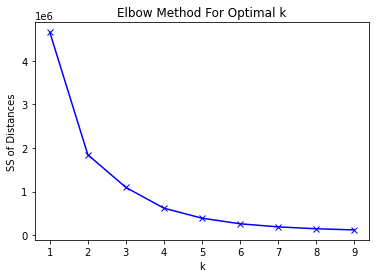

In [102]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(1,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(df_numerical)
       SS_distances.append(k_means.inertia_)
   
centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

### 3 is optimal number for clusters in numerical features 

In [103]:
k_means = KMeans(n_clusters=3)
k_means= k_means.fit(df_numerical)
labels = k_means.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 73495, 138989, 163301]))

### Plotting data 

### 1. 'Issue Time' with respect to the index

In [104]:
k_means.cluster_centers_

array([[17.37002708],
       [ 8.85011771],
       [12.69640137]])

### As it is only one feature, we introduce an index array for other axis. The values are hardcoded here

In [105]:
index_center = [[180000],[180000],[180000]]


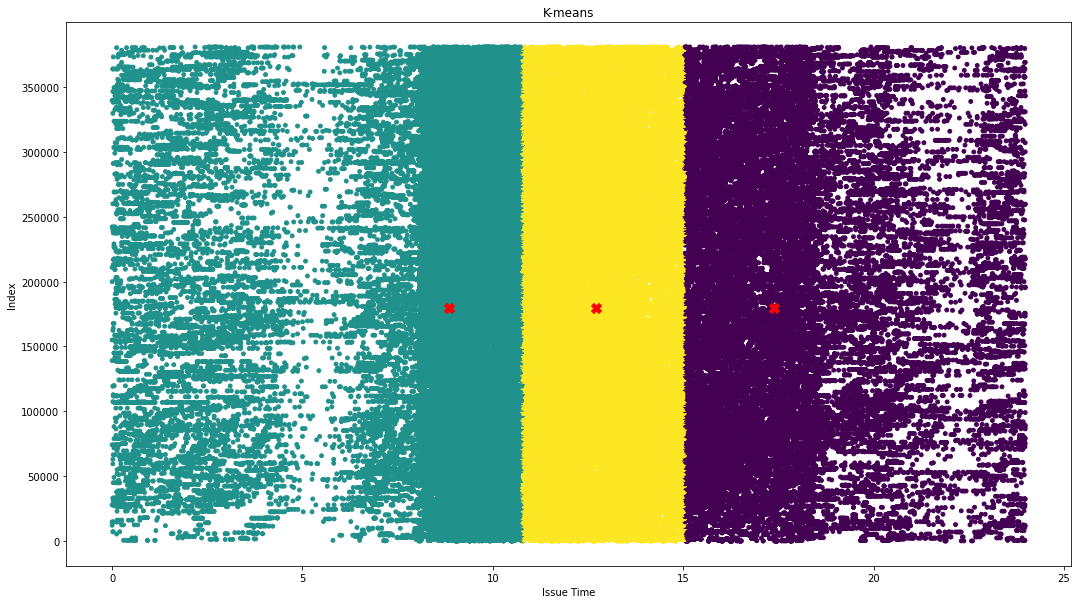

In [106]:
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(18,10))
plt.scatter(df_numerical['Issue Time Decimal'],df.index,c=labels,s=15)
plt.scatter(centers[:,0], index_center, color ='red', marker='X', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Index')
plt.title('K-means')
plt.show()

## K MODES Clustering

In [107]:
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [108]:
df_categorical.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date
162,audi,black,19,Antwerp Way,1500,Q1
163,audi,black,12,First Avenue,3254,Q1
164,audi,black,12,Ingestre Road,1498,Q1
165,audi,black,12,Lawrence Road E6,3299,Q1
166,audi,black,12,Napier Road E15,1434,Q1


### Elbow Method for optimal number of clusters

In [109]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_clusters = cluster)
        kmodes.fit_predict(df_categorical)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [110]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')

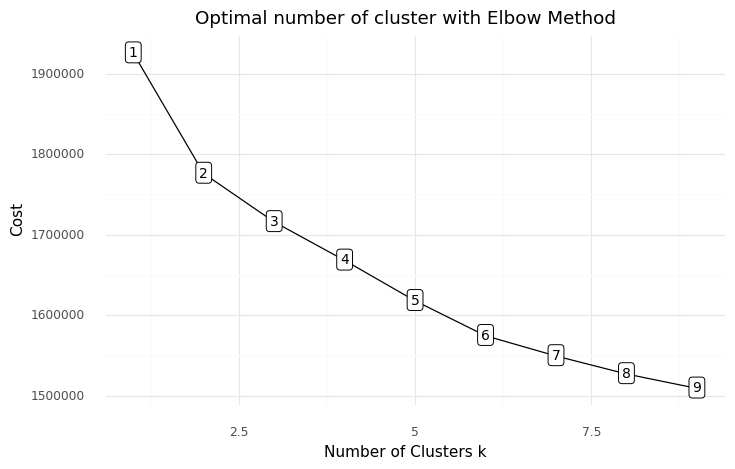

<ggplot: (8783488073889)>

In [111]:

# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

### Optimal number of clusters for Categorical data = 3

In [112]:
kmodes = KModes(n_clusters = 3)
kmodes.fit_predict(df_categorical)
cost=kmodes.cost_
labels_kmode = kmodes.labels_

In [113]:
labels_kmode

array([0, 0, 0, ..., 1, 1, 1], dtype=uint16)

In [114]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([217229, 104920,  53636]))

In [115]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


In [116]:
## Load Dataset
df_new = pd.read_csv('Processed.csv')
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


### Adding cluster labels in the dataframe

In [117]:
df_new['clusters_k_means'] = labels

In [118]:

df_new['clusters_k_mode'] = labels_kmode
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,1,0
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,1,0
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,1,0
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,1,0
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,1,0


In [119]:
df.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52
163,audi,black,10:30,12,First Avenue,3254,Q1,10.50
164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50
165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50
166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50


## K Prototype for complete dataset

In [120]:
from kmodes.kprototypes import KPrototypes

In [121]:
df_new.head()

,Unnamed: 0,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode
0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,1,0
1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,1,0
2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,1,0
3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,1,0
4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,1,0


- Keeping the original features of the dataset

In [122]:
df =df_new[['Make', 'Colour', 'Contravention Code', 'Location','PA_Details', 'Issue Date','Issue Time Decimal']]
df.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,audi,black,19,Antwerp Way,1500,Q1,9.52
1,audi,black,12,First Avenue,3254,Q1,10.50
2,audi,black,12,Ingestre Road,1498,Q1,10.50
3,audi,black,12,Lawrence Road E6,3299,Q1,10.50
4,audi,black,12,Napier Road E15,1434,Q1,10.50


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375785 entries, 0 to 375784
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Make                375785 non-null  object 
 1   Colour              375785 non-null  object 
 2   Contravention Code  375785 non-null  object 
 3   Location            375785 non-null  object 
 4   PA_Details          375785 non-null  int64  
 5   Issue Date          375785 non-null  object 
 6   Issue Time Decimal  375785 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.1+ MB


- Inspecting the categorical variables

In [124]:
# Inspect the categorical variables
df.select_dtypes('object').nunique()

Make                   126
Colour                  24
Contravention Code      79
Location              1626
Issue Date              12
dtype: int64

- Inspecting the Numerical variables

In [125]:
# Inspect the numerical variables
df.describe()

,PA_Details,Issue Time Decimal
count,375785.000000,375785.000000
mean,1823.770598,12.187858
std,758.535435,3.521284
min,777.000000,0.000000
25%,1433.000000,9.800000
50%,1468.000000,11.830000
75%,1519.000000,14.300000
max,9999.000000,23.980000


In [126]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Make', 'Colour', 'Contravention Code', 'Location', 'Issue Date']
Categorical columns position  : [0, 1, 2, 3, 5]


In [127]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['audi', 'black', '19', ..., 1500, 'Q1', 9.52],
       ['audi', 'black', '12', ..., 3254, 'Q1', 10.5],
       ['audi', 'black', '12', ..., 1498, 'Q1', 10.5],
       ...,
       ['yamaha', 'white', '81', ..., 1458, 'Q12', 16.5],
       ['yamaha', 'white', '62', ..., 1475, 'Q12', 17.07],
       ['yamaha', 'white', '1', ..., 3237, 'Q12', 17.13]], dtype=object)

## K Prototype

In [210]:
kprototype = KPrototypes(n_clusters = 3)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)


array([0, 2, 0, ..., 0, 0, 2], dtype=uint16)

In [211]:
labels_kprototype = kprototype.labels_

### Adding cluster labels in the dataframe

In [212]:
df_new['clusters_k_prototype'] = labels_kprototype
df_new.head()

,Original_Index,Original_Index,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,1,0,0
1,1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,1,0,2
2,2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,1,0,0
3,3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,1,0,2
4,4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,1,0,0


### Saving cluster lables to clustered_data.csv file.

In [213]:


df_new.rename(columns = {'Unnamed: 0':'Original_Index'}, inplace = True)
df_new.head()

,Original_Index,Original_Index,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal,clusters_k_means,clusters_k_mode,clusters_k_prototype
0,0,162,audi,black,9:31,19,Antwerp Way,1500,Q1,9.52,1,0,0
1,1,163,audi,black,10:30,12,First Avenue,3254,Q1,10.50,1,0,2
2,2,164,audi,black,10:30,12,Ingestre Road,1498,Q1,10.50,1,0,0
3,3,165,audi,black,10:30,12,Lawrence Road E6,3299,Q1,10.50,1,0,2
4,4,166,audi,black,10:30,12,Napier Road E15,1434,Q1,10.50,1,0,0


In [214]:
df_new.to_csv('clustered_data.csv')

In [215]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([241771,  80943,  53071]))

In [216]:
type(labels)

pandas.core.series.Series

### Visualising count of records in each cluster

- "Count of records in each cluster in Clustered data for Numerical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Numerical Features')

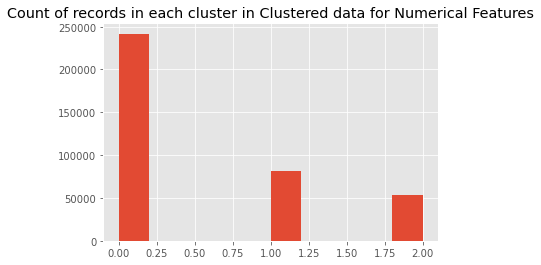

In [217]:
a = np.hstack(labels)
_ = plt.hist(a)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Numerical Features")

In [218]:
np.unique(labels_kmode, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([217229, 104920,  53636]))

- "Count of records in each cluster in Clustered data for Categorical Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for Categorical Features')

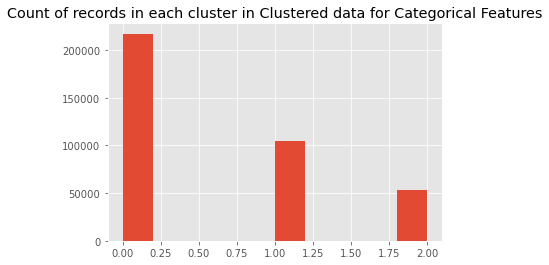

In [219]:
b = np.hstack(labels_kmode)
_ = plt.hist(b)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for Categorical Features")

In [258]:
np.unique(labels_kprototype, return_counts = True)

(array([0, 1, 2], dtype=uint16), array([241771,  53071,  80943]))

- "Count of records in each cluster in Clustered data for all Features"

Text(0.5, 1.0, 'Count of records in each cluster in Clustered data for all Features')

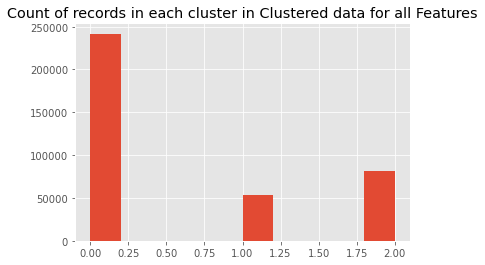

In [259]:
c= np.hstack(labels_kprototype)
_ = plt.hist(c)  # arguments are passed to np.histogram
plt.title("Count of records in each cluster in Clustered data for all Features")

## Evaluating clustering 
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [140]:
from sklearn.metrics.cluster import silhouette_score
print('silhouette_score:',metrics.silhouette_score(df_numerical, k_means.labels_))

silhouette_score: 0.5287655613105677


Our silhouette_score is very close to 1 which indicates that our clusters are well apart from each other and clearly distinguished.

## K Prototype analysis on actual dates.

### Creating 3 dataframes for each cluster label in K prototype Method.

In [260]:
#df_new = pd.read_csv('clustered_data.csv')

In [261]:
df_new.columns

Index(['Original_Index', 'Original_Index', 'Make', 'Colour', 'Issue Time',
       'Contravention Code', 'Location', 'PA_Details', 'Issue Date',
       'Issue Time Decimal', 'clusters_k_means', 'clusters_k_mode',
       'clusters_k_prototype'],
      dtype='object')

In [262]:
labels_kprot = df_new['clusters_k_prototype']
labels_kprot

0         0
1         2
2         0
3         2
4         0
         ..
375780    0
375781    2
375782    0
375783    0
375784    2
Name: clusters_k_prototype, Length: 375785, dtype: uint16

In [263]:
cluster1= df_new.loc[df_new['clusters_k_prototype'] == 0]
cluster2= df_new.loc[df_new['clusters_k_prototype'] == 1]
cluster3= df_new.loc[df_new['clusters_k_prototype'] == 2]
cluster1.shape,cluster2.shape,cluster3.shape

((241771, 13), (53071, 13), (80943, 13))

### Keeping original columns of the dataframe

In [264]:
cluster1 = cluster1[['Make', 'Colour',
       'Contravention Code', 'Location', 'PA_Details', 'Issue Date',
       'Issue Time Decimal']]
cluster2 = cluster2[['Make', 'Colour',
       'Contravention Code', 'Location', 'PA_Details', 'Issue Date',
       'Issue Time Decimal']]
cluster3 = cluster3[['Make', 'Colour',
       'Contravention Code', 'Location', 'PA_Details', 'Issue Date',
       'Issue Time Decimal']]
cluster1.head()

,Make,Colour,Contravention Code,Location,PA_Details,Issue Date,Issue Time Decimal
0,audi,black,19,Antwerp Way,1500,Q1,9.52
2,audi,black,12,Ingestre Road,1498,Q1,10.50
4,audi,black,12,Napier Road E15,1434,Q1,10.50
7,audi,black,19,Kings Road,1433,Q1,10.50
8,audi,black,19,Upperton Road West,1522,Q1,10.50


### 1. Analysis - "Make" 

No clear grouping of feature 'Make' 

In [265]:
cluster1['Make'].value_counts()

ford            33602
mercedes        30157
bmw             26343
vauxhall        23530
volkswagen      23507
                ...  
leyland             1
bedford             1
autobianchi         1
austin rover        1
hyosung             1
Name: Make, Length: 115, dtype: int64

In [266]:
cluster2['Make'].value_counts()

ford          6941
mercedes      6655
bmw           5652
vauxhall      5243
volkswagen    4867
              ... 
gilera           1
mz               1
ssang Yong       1
lincoln          1
noble            1
Name: Make, Length: 92, dtype: int64

In [267]:
cluster3['Make'].value_counts()

ford          11599
mercedes       9666
bmw            8863
vauxhall       8152
volkswagen     7756
              ...  
moto guzzi        1
american          1
aixam             1
dennis            1
cherokee          1
Name: Make, Length: 99, dtype: int64

### 2. Analysis - "Colour" 

No clear grouping of feature 'Colour' 

In [268]:
cluster1['Colour'].value_counts()

black             53336
white             44560
silver            37127
other             34244
grey              25343
blue              24249
red                9742
unspecified        8813
green              1980
yellow              780
brown               440
gold                254
purple              194
orange              192
cream               144
maroon              136
beige               123
bronze               46
burgundy             43
pink                 13
multi-coloured        5
light blue            5
mauve                 2
Name: Colour, dtype: int64

In [269]:
cluster2['Colour'].value_counts()

black             11505
other              9650
white              8965
silver             7766
grey               5715
blue               5345
red                2111
unspecified         938
green               429
yellow              132
orange              100
beige                88
brown                84
gold                 63
maroon               56
purple               49
bronze               41
cream                23
multi-coloured        5
pink                  4
light blue            1
turquoise             1
Name: Colour, dtype: int64

In [270]:
cluster3['Colour'].value_counts()

black          19520
white          14485
silver         13720
grey           10413
blue            9152
other           5953
red             3291
unspecified     2193
green            926
yellow           372
brown            252
gold             136
maroon           115
purple            88
burgundy          86
orange            81
cream             66
beige             44
bronze            39
pink               7
mauve              3
turquoise          1
Name: Colour, dtype: int64

### 3. Analysis - "Issue Time" 

We have observed a slight grouping of penalties on the basis of Issue Time.  

In [271]:
df_new['Issue Time Decimal'].value_counts()

9.32    895
9.17    877
9.42    870
9.30    870
9.35    865
       ... 
5.07      2
5.42      2
5.03      1
5.33      1
5.32      1
Name: Issue Time Decimal, Length: 1438, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high in the office hours i.e. **8am to 5pm.**

- Most number of fines are in the morning hours of 8:00am and 9:00am.

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [272]:
cluster1['Issue Time Decimal'].value_counts()

9.38    577
9.32    574
9.62    570
9.33    567
9.42    565
       ... 
5.23      1
5.32      1
5.30      1
5.15      1
5.42      1
Name: Issue Time Decimal, Length: 1436, dtype: int64

- Cluster 1 consists of more fines of morning in the office hours i.e. 08:00  to 15:00.

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [273]:
cluster2['Issue Time Decimal'].value_counts()

8.47     139
11.82    130
9.17     127
11.58    119
11.78    119
        ... 
5.27       1
22.58      1
6.08       1
4.92       1
4.72       1
Name: Issue Time Decimal, Length: 1401, dtype: int64

- Cluster 2 consists of more fines of morning i.e. before 9:00 am and after 11:00 am and it ranges from 0900 to 1800

- The least number of fines are in the early morning i.e. 4:00 am and 5:00 am

In [274]:
cluster3['Issue Time Decimal'].value_counts()

9.40     225
9.30     221
9.55     217
11.87    215
11.65    214
        ... 
3.05       1
1.72       1
22.70      1
22.07      1
23.32      1
Name: Issue Time Decimal, Length: 1063, dtype: int64

- Cluster 3 consists of more fines of morning i.e. 0900 - 11:00 am


In [ ]:
.cluster_centers_
index_center = [[180000],[180000],[180000]]
# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(18,10))
plt.scatter(df_numerical['Issue Time Decimal'],df.index,c=labels,s=15)
plt.scatter(centers[:,0], index_center, color ='red', marker='X', s=100) 
plt.xlabel('Issue Time')
plt.ylabel('Index')
plt.title('K-means')
plt.show()

In [325]:

centers_kprot= kprototype.cluster_centroids_[:,1]
centers_kprot

numpy.ndarray

In [323]:
centers

array([[17.37002708],
       [ 8.85011771],
       [12.69640137]])

In [327]:
centers_kprot[0:]

array(['12.085592523503779', '12.52776111247441', '12.270456864707127'],
      dtype='<U32')

In [337]:
centers_kprot.shape

(3,)

In [336]:
centers.shape

(3, 1)

In [334]:
B = np.reshape(centers_kprot, (-1, 3))
B

array([['12.085592523503779', '12.52776111247441', '12.270456864707127']],
      dtype='<U32')

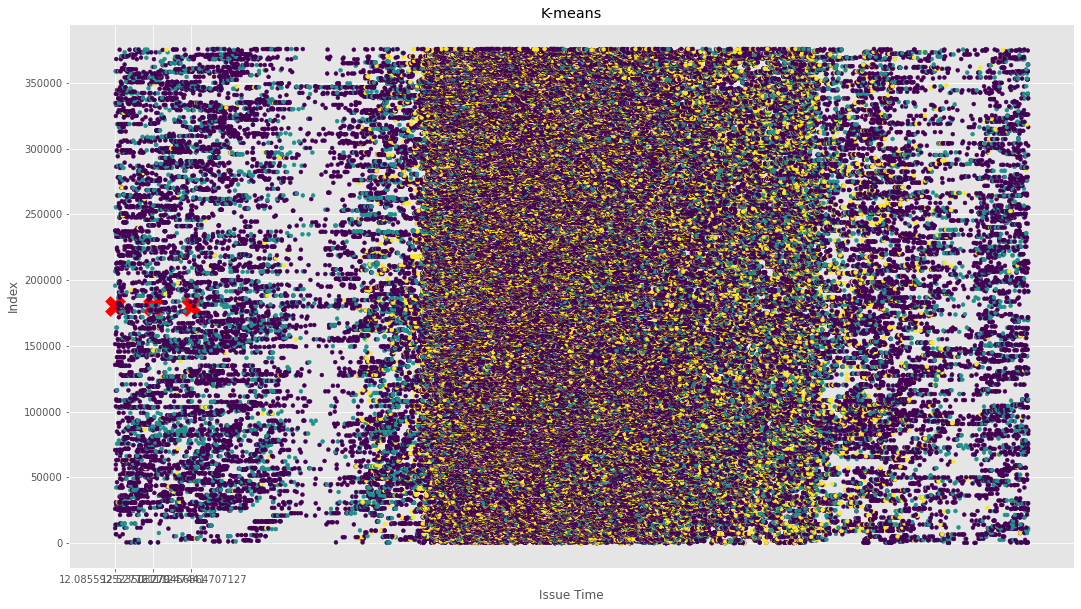

In [343]:
# Plot Clusters and their centers

labels = labels_kprot

plt.figure(figsize=(18,10))
plt.scatter(centers_kprot, index_center, color ='red', marker='X', s=400)
plt.scatter(df_new['Issue Time Decimal'],df_new.index,c=labels,s=15)
 
plt.xlabel('Issue Time')
plt.ylabel('Index')
plt.title('K-means')
plt.show()

- Cluster 3 consists of more fines of morning after 11:00 am

- The least number of fines are in the early morning i.e. 4:00 am and 3:00 am

### 4. Analysis - "Contravention Code" 

There is no grouping observed on the basis of "Contravention Code". 


In [276]:
df_new['Contravention Code'].value_counts()

12     132480
1       85506
19      36409
62      18952
30      18084
        ...  
7           1
23p         1
5u)         1
23r         1
57          1
Name: Contravention Code, Length: 79, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132480**
**Contravention Code : 1 - 85506**

- Most number of fines are with **Contravention Code : 12** i.e 132480

- The least number of fines are with **Contravention Codes : 23p,5u), 23r, 71,57**  - 1 each

In [277]:
cluster1['Contravention Code'].value_counts()

12      86404
1       53453
19      24402
62      13347
30      11084
        ...  
56          1
96          1
82u)        1
23r         1
57          1
Name: Contravention Code, Length: 72, dtype: int64

In Cluster1, dominating Contravention Code is 12 followed by Contravention Code: 1.

In [278]:
cluster2['Contravention Code'].value_counts()

12      15272
1       12904
19       4593
25       3774
62       3163
165      2209
30       2132
27        905
21        895
40        808
165)      635
11u       607
01a       573
01o       420
2         399
6         396
16        389
83        292
99        280
87        228
26        225
55        216
54        195
73u       188
92        170
47        132
48        113
01o)      109
23g       108
11u)       96
23c        88
14         70
73         61
91         55
45         51
86         43
5          40
82         37
61         31
05u        30
24         26
81         20
62g        20
82u        14
95         14
62g)       11
22          9
80          7
11          4
23          2
61g         2
28          2
4           1
23s         1
23e         1
85          1
56          1
61g)        1
49          1
164         1
Name: Contravention Code, dtype: int64

In Cluster2, dominating Contravention Code is 12 followed by Contravention Code: 1.

In [279]:
cluster3['Contravention Code'].value_counts()

12      30804
1       19149
19       7414
30       4868
62       2442
        ...  
164         1
23s         1
82u)        1
23p         1
5u)         1
Name: Contravention Code, Length: 66, dtype: int64

In Cluster3, dominating Contravention Code is 12 followed by Contravention Code: 1.

## Conclusion

### Interesting Observations: 


- **Issue Time** The frequency of fines is high in the office hours i.e. **8am to 5pm.**
   - Most number of fines are in the morning hours of 8:00am and 9:00am.
   - The least number of fines are in the early morning i.e. 4:00 am and 5:00 am.
 

----------------

- **Contravention Code** - From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132484**
**Contravention Code : 1 - 85529**

  - Most number of fines are with **Contravention Code : 12** i.e 132490

  - The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

----------------

- **Location** - Most of the fines are conducted at following streets.
  
   - High Street North    7837

   - Barking Road         4585

   - Thorpe Road          4049

---------------
- **Issue Date** - 
  - Most of the fines are observed at the end of 1st year i.e. quarter 4 (October 2019 - December 2019)



---------------- 
----------------
----------------

## Cluster Analysis

1. **We have observed a very clear segregation of clusters on the basis of Issue Time. Fines occurred at similar times formed their respective groups**

- Cluster 1 consists of more fines of morning in the office hours i.e. 08:00  to 15:00.


- Cluster 2 consists of more fines of morning i.e. before 9:00 am and after 11:00 am and it ranges from 0900 to 1800


- Cluster 3 consists of more fines of morning i.e. 0900 - 11:00 am


-----------------

2. **We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster.**


-----------------
3. **We have observed a slight grouping in the Location as well.**

**Cluster 1 consists of most of the fines occured at following locations:**

- High Street North    4576
- Barking Road         3397
- Westfield Avenue     2665
  

**Cluster 2 consists of most of the fines occured at following locations:** 
- Oxford Road            952
- Westfield Avenue       810
- Clova Road             633


**Cluster 3 consists of most of the fines occured at following locations:**
- High Street North    2946
- Thorpe Road          1870
- St. Johns Road E6    1162
- Romford Road         1090

### 5. Analysis - "Location" 

We have Observed slight better grouping of fines on the basis of Location

**Cluster 1 consists of most of the fines occured at following locations:**

- High Street North    4576
- Barking Road         3397
- Westfield Avenue     2665
  

**Cluster 2 consists of most of the fines occured at following locations:** 
- Oxford Road            952
- Westfield Avenue       810
- Clova Road             633


**Cluster 3 consists of most of the fines occured at following locations:**
- High Street North    2946
- Thorpe Road          1870
- St. Johns Road E6    1162
- Romford Road         1090

In [280]:
df_new['Location'].value_counts()

High Street North    7836
Barking Road         4585
Thorpe Road          4049
Kempton Road         3770
Westfield Avenue     3688
                     ... 
Neville Road E13        1
McDowall Close          1
Grebe Close             1
Long Wall               1
Phoebe Walk             1
Name: Location, Length: 1626, dtype: int64

From the count of fines in the original dataset, the frequency of fines is high at following location

**High Street North : 7837 fines**

**Barking Road : 4585**

In [281]:
cluster1['Location'].value_counts()

High Street North    4576
Barking Road         3397
Westfield Avenue     2665
Kempton Road         2287
Skeffington Road     2175
                     ... 
Spur Road               1
Grebe Close             1
Long Wall               1
Priory Court            1
Wooder Gardens          1
Name: Location, Length: 1604, dtype: int64

In [282]:
cluster2['Location'].value_counts()

Oxford Road           952
Westfield Avenue      810
Clova Road            633
Broadway              504
Burges Road           504
                     ... 
Plaistow Park Road      1
Barrington Road         1
Boundary Lane           1
Silverland Street       1
Bridgeland Road         1
Name: Location, Length: 1299, dtype: int64

In [283]:
cluster3['Location'].value_counts()

High Street North    2945
Thorpe Road          1870
St. Johns Road E6    1162
Romford Road         1090
Kempton Road         1042
                     ... 
Wakerly Close           1
Comyns Close            1
Emily Street            1
Gatcombe Road           1
Canterbury Close        1
Name: Location, Length: 1457, dtype: int64

### 6. Analysis - "PA_Details" 

We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster. 

**Cluster 1 consists of most of the fines  by following PA_Details:** 

**PA_Details : Frequency** 
- 1468  :  10707
- 1466  :   9819
- 1456  :   9766
- 1453  :   9671

**Cluster 2 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 1142  :  6729
- 1313  :  6518
- 1331  :  6417
- 1306  :  6195

**Cluster 3 consists of most of the fines by following PA_Details:**

**PA_Details : Frequency** 
- 3247  :  5971
- 3235  :  4602
- 3266  :  4564
- 3216  :  3442

In [284]:
df_new['PA_Details'].value_counts()

1468    10707
1466     9819
1456     9766
1453     9671
1419     9307
        ...  
9999        3
3165        1
777         1
1460        1
3197        1
Name: PA_Details, Length: 170, dtype: int64

In [285]:
cluster1['PA_Details'].value_counts()

1468    10707
1466     9819
1456     9766
1453     9671
1419     9307
        ...  
1440       33
1501       21
1483       13
1430       11
1460        1
Name: PA_Details, Length: 80, dtype: int64

In [286]:
cluster2['PA_Details'].value_counts()

1142    6729
1313    6518
1331    6417
1306    6195
1278    5396
1252    4979
1281    4019
1145    4010
1318    2400
1309    2318
1146    1268
992     1212
1351    1031
1247     417
1035      95
1308      66
777        1
Name: PA_Details, dtype: int64

In [287]:
cluster3['PA_Details'].value_counts()

3247    5971
3235    4602
3266    4564
3216    3442
3264    3018
        ... 
3263       5
3281       4
9999       3
3165       1
3197       1
Name: PA_Details, Length: 73, dtype: int64

### 7. Analysis - "Issue Date" (quarters)


We have observed no significant impact of Issue time on grouping.

In [288]:
df_new['Issue Date'].value_counts()

Q4     41724
Q3     39490
Q2     38187
Q5     37073
Q1     34195
Q12    34063
Q10    32739
Q11    32391
Q8     25897
Q9     25229
Q7     20621
Q6     14176
Name: Issue Date, dtype: int64

In [289]:
cluster1['Issue Date'].value_counts()

Q4     26730
Q3     25408
Q2     24569
Q5     23572
Q1     22192
Q12    22032
Q11    20949
Q10    20783
Q8     16801
Q9     16164
Q7     13071
Q6      9500
Name: Issue Date, dtype: int64

In [290]:
cluster2['Issue Date'].value_counts()

Q4     6077
Q3     5559
Q5     5493
Q2     5294
Q10    4857
Q12    4650
Q11    4560
Q1     4435
Q9     3513
Q8     3505
Q7     3317
Q6     1811
Name: Issue Date, dtype: int64

In [291]:
cluster3['Issue Date'].value_counts()

Q4     8917
Q3     8523
Q2     8324
Q5     8008
Q1     7568
Q12    7381
Q10    7099
Q11    6882
Q8     5591
Q9     5552
Q7     4233
Q6     2865
Name: Issue Date, dtype: int64

## Conclusion

### Interesting Observations: 


- **Issue Time** The frequency of fines is high in the office hours i.e. **8am to 5pm.**
   - Most number of fines are in the morning hours of 8:00am and 9:00am.
   - The least number of fines are in the early morning i.e. 4:00 am and 5:00 am.
 

----------------

- **Contravention Code** - From the count of fines in the original dataset, the frequency of fines is high with 
**Contravention Code : 12- 132484**
**Contravention Code : 1 - 85529**

  - Most number of fines are with **Contravention Code : 12** i.e 132490

  - The least number of fines are with **Contravention Codes : 7,4,71,57**  - 1 each

----------------

- **Location** - Most of the fines are conducted at following streets.
  
   - High Street North    7837

   - Barking Road         4585

   - Thorpe Road          4049

---------------
- **Issue Date** - 
  - Most of the fines are observed at the end of 1st year i.e. quarter 4 (October 2019 - December 2019)



---------------- 
----------------
----------------

## Cluster Analysis

1. **We have observed a very clear segregation of clusters on the basis of Issue Time. Fines occurred at similar times formed their respective groups**

- Cluster 1 consists of more fines of morning in the office hours i.e. 08:00  to 15:00.


- Cluster 2 consists of more fines of morning i.e. before 9:00 am and after 11:00 am and it ranges from 0900 to 1800


- Cluster 3 consists of more fines of morning i.e. 0900 - 11:00 am


-----------------

2. **We have observed a very clear segregation of clusters on the basis of PA_Details. Fines carried by similar PAs are grouped in similar cluster.**


-----------------
3. **We have observed a slight grouping in the Location as well.**

**Cluster 1 consists of most of the fines occured at following locations:**

- High Street North    4576
- Barking Road         3397
- Westfield Avenue     2665
  

**Cluster 2 consists of most of the fines occured at following locations:** 
- Oxford Road            952
- Westfield Avenue       810
- Clova Road             633


**Cluster 3 consists of most of the fines occured at following locations:**
- High Street North    2946
- Thorpe Road          1870
- St. Johns Road E6    1162
- Romford Road         1090

In [397]:
dataframe= pd.read_csv('Project Parking Data 4.csv')
dataframe.head()

,Make,Colour,Issue Time,Contravention Code,Location,PA_Details,Issue Date
0,0,NaN,0:15,1,North Crescent,1485,1/1/19
1,0,NaN,0:19,16,Anne Street,1456,1/1/19
2,0,NaN,0:19,25,Celebration Avenue,1252,1/1/19
3,0,NaN,0:20,01o,Honour Lea Avenue,1313,1/1/19
4,0,NaN,0:22,62,Warton Road,1456,1/1/19


In [398]:

dataframe.shape

(380639, 7)

In [399]:
dataframe.dropna(inplace=True)
dataframe.shape

(377034, 7)

In [409]:
dataframe['Issue Time'].head()


162     9:31
163    10:30
164    10:30
165    10:30
166    10:30
Name: Issue Time, dtype: object

In [410]:
dataframe['Issue Time'] = pd.to_timedelta('00:'+dataframe['Issue Time']).dt.total_seconds()/60
dataframe['Issue Time']


162        9.516667
163       10.500000
164       10.500000
165       10.500000
166       10.500000
            ...    
380634    15.516667
380635    16.416667
380636    16.500000
380637    17.066667
380638    17.133333
Name: Issue Time, Length: 377034, dtype: float64